**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
DIR = "/content/drive/MyDrive/Ciencia de datos/Actividad 7"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
cereals_df = pd.read_csv('/content/drive/MyDrive/Ciencia de datos/Actividad 7/Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [6]:
 cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [8]:
mfr_counts = cereals_df['mfr'].value_counts()
print("Frecuencia de fabricantes:\n",mfr_counts)

Frecuencia de fabricantes:
 mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


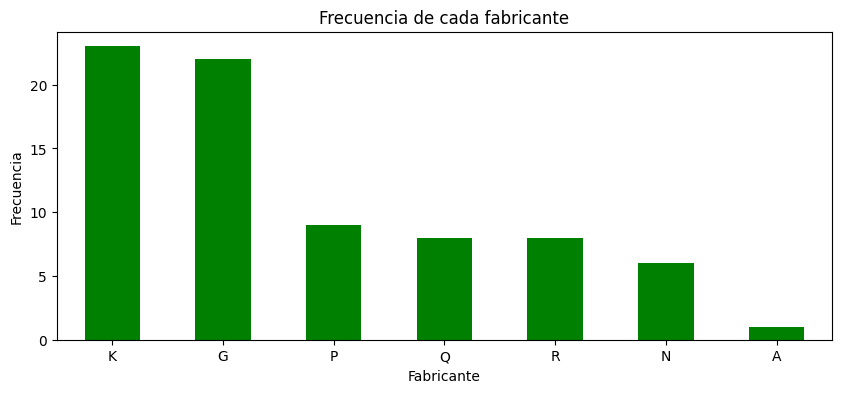

In [10]:
plt.figure(figsize=(10,4))
mfr_counts.plot(kind='bar', color='Green')
plt.title("Frecuencia de cada fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

In [9]:
shelf_counts = cereals_df['shelf'].value_counts()
print("Frecuencia de fabricantes:\n",shelf_counts)

Frecuencia de fabricantes:
 shelf
3    36
2    21
1    20
Name: count, dtype: int64


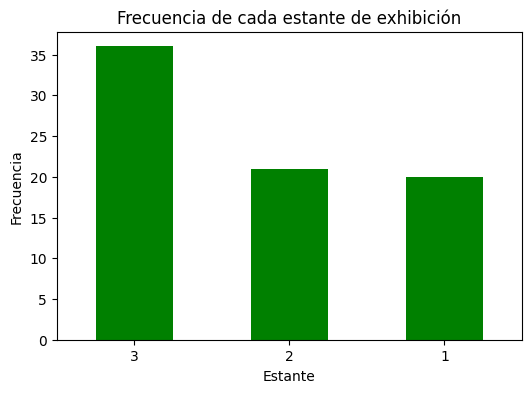

In [11]:
plt.figure(figsize=(6,4))
shelf_counts.plot(kind='bar', color='Green')
plt.title("Frecuencia de cada estante de exhibición")
plt.xlabel("Estante")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [13]:
mfr_shelf_counts = pd.crosstab(cereals_df["mfr"], cereals_df["shelf"])
print("Cantidad de productos por fabricante y estante:\n", mfr_shelf_counts)

Cantidad de productos por fabricante y estante:
 shelf  1  2   3
mfr            
A      0  1   0
G      6  7   9
K      4  7  12
N      3  2   1
P      2  1   6
Q      1  3   4
R      4  0   4


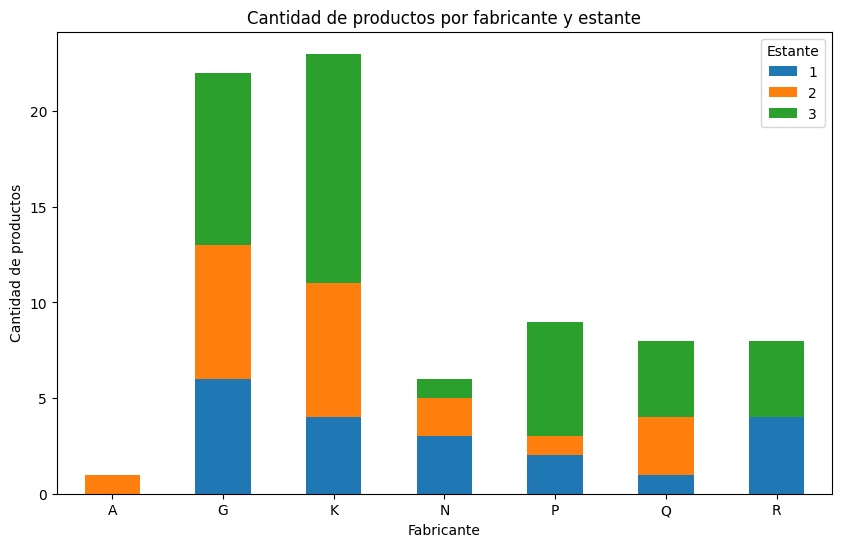

In [15]:
mfr_shelf_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Cantidad de productos por fabricante y estante")
plt.xlabel("Fabricante")
plt.ylabel("Cantidad de productos")
plt.xticks(rotation=0)
plt.legend(title="Estante",)
plt.show()

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [19]:
rango_df = cereals_df["rating"].value_counts()
print("Rango más frecuente de la variable rating:\n", rango_df)

Rango más frecuente de la variable rating:
 rating
68.402973    1
40.692320    1
49.511874    1
63.005645    1
60.756112    1
            ..
31.435973    1
32.207582    1
44.330856    1
36.176196    1
36.187559    1
Name: count, Length: 77, dtype: int64


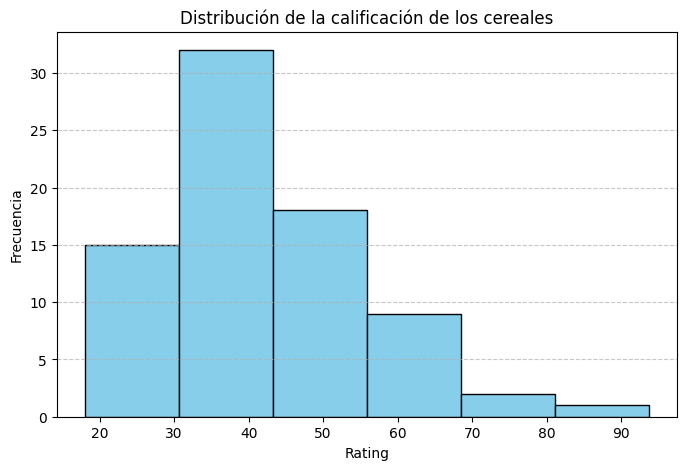

In [16]:
plt.figure(figsize=(8,5))
plt.hist(cereals_df["rating"], bins=6, edgecolor="black", color="skyblue")
plt.title("Distribución de la calificación de los cereales")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [20]:
best_cereales = cereals_df[["name", "mfr", "rating"]].sort_values(by="rating", ascending=False).head(10)
print("Los 10 cereales mejor evaluados y sus fabricantes:\n", best_cereales)

Los 10 cereales mejor evaluados y sus fabricantes:
                          name mfr     rating
3   All-Bran_with_Extra_Fiber   K  93.704912
64     Shredded_Wheat_'n'Bran   N  74.472949
65  Shredded_Wheat_spoon_size   N  72.801787
0                   100%_Bran   N  68.402973
63             Shredded_Wheat   N  68.235885
20     Cream_of_Wheat_(Quick)   N  64.533816
55               Puffed_Wheat   Q  63.005645
54                Puffed_Rice   Q  60.756112
50          Nutri-grain_Wheat   K  59.642837
2                    All-Bran   K  59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

<ipython-input-21-8b3345fcd1b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="mfr", y="calories", data=cereals_df, palette="Set2")


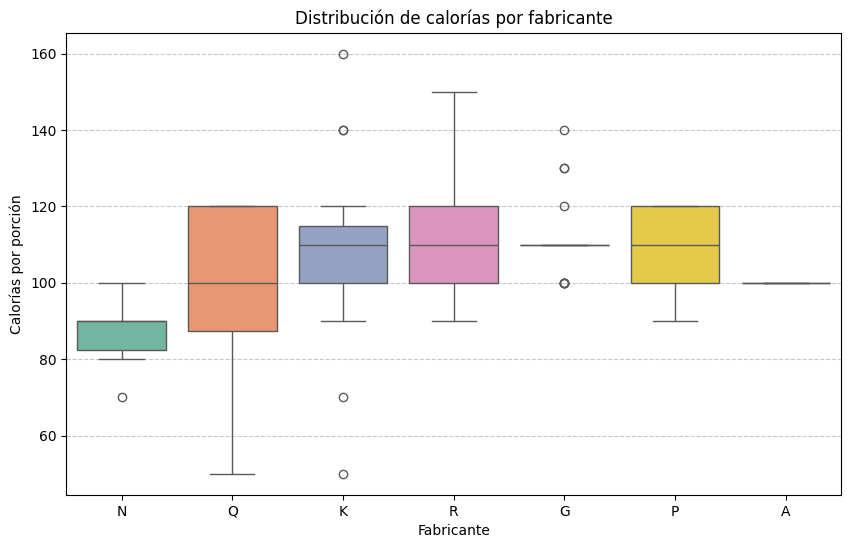

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="mfr", y="calories", data=cereals_df, palette="Set2")
plt.title("Distribución de calorías por fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Calorías por porción")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

In [23]:
correlation_matrix = cereals_df.select_dtypes(include=np.number).corr()
rating_correlation = correlation_matrix["rating"].drop("rating")
top_2_correlated = rating_correlation.abs().nlargest(2)

print("Las dos variables con mayor correlación con rating son:\n", top_2_correlated)

Las dos variables con mayor correlación con rating son:
 sugars      0.763902
calories    0.689376
Name: rating, dtype: float64


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [24]:
df_clean = cereals_df.dropna()
df_clean.reset_index(drop=True, inplace=True)

print("Nuevo tamaño del DataFrame después de eliminar valores nulos:", df_clean.shape)
print(df_clean.head())  # Mostrar las primeras filas para verificar

Nuevo tamaño del DataFrame después de eliminar valores nulos: (74, 16)
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4    Apple_Cinnamon_Cheerios   G    C       110        2    2     180    1.5   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   10.5    10.0    70.0        25      1     1.0  0.75  29.509541  


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df_clean["rating"]
X = df_clean.select_dtypes(include=["number"]).drop(columns=["rating"])

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

print("Primeras filas después de PCA:\n", df_pca.head())

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())

Primeras filas después de PCA:
         PC1       PC2
0  4.870399 -2.934238
1  1.761110  0.210993
2  4.727161 -2.402254
3  5.142814 -4.401826
4 -0.332394  0.284619
Varianza explicada por cada componente: [0.2766149  0.22059749]
Varianza total explicada: 0.49721238944942525


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

In [29]:
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

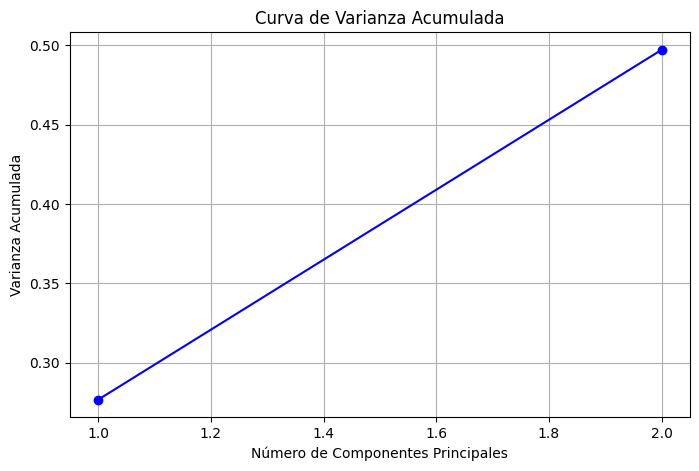

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color='blue')
plt.title("Curva de Varianza Acumulada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.grid(True)
plt.show()

In [31]:
num_componentes_90 = (varianza_acumulada >= 0.90).argmax() + 1

print(f"El número mínimo de componentes principales que explica más del 90% de la varianza es: {num_componentes_90}")
print("Varianza explicada por cada componente hasta este número:")
print(pca.explained_variance_ratio_[:num_componentes_90])

El número mínimo de componentes principales que explica más del 90% de la varianza es: 1
Varianza explicada por cada componente hasta este número:
[0.2766149]


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [32]:
component_1_loadings = pca.components_[0]

loadings_df = pd.DataFrame({
    'Variable': X.columns,
    'Carga': component_1_loadings
})

In [33]:
loadings_df['Carga Absoluta'] = np.abs(loadings_df['Carga'])
loadings_df = loadings_df.sort_values(by='Carga Absoluta', ascending=False)

print("Las tres variables más importantes en el cálculo del primer componente son:")
print(loadings_df[['Variable', 'Carga Absoluta']].head(3))

Las tres variables más importantes en el cálculo del primer componente son:
   Variable  Carga Absoluta
7    potass        0.502603
4     fiber        0.458623
11     cups        0.371154


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [36]:
df_encoded = pd.get_dummies(df_clean, columns=["mfr", "type"], drop_first=True)
print(df_encoded.head())

                        name  calories  protein  fat  sodium  fiber  carbo  \
0                  100%_Bran        70        4    1     130   10.0    5.0   
1          100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                   All-Bran        70        4    1     260    9.0    7.0   
3  All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4    Apple_Cinnamon_Cheerios       110        2    2     180    1.5   10.5   

   sugars  potass  vitamins  ...  weight  cups     rating  mfr_G  mfr_K  \
0     6.0   280.0        25  ...     1.0  0.33  68.402973  False  False   
1     8.0   135.0         0  ...     1.0  1.00  33.983679  False  False   
2     5.0   320.0        25  ...     1.0  0.33  59.425505  False   True   
3     0.0   330.0        25  ...     1.0  0.50  93.704912  False   True   
4    10.0    70.0        25  ...     1.0  0.75  29.509541   True  False   

   mfr_N  mfr_P  mfr_Q  mfr_R  type_H  
0   True  False  False  False   False  


Se aplico One-hot encoding ya que las variables mfr y type, ambas son variables categoricas sin un orden natural. Al usar One-Hot Encoding, convertimos cada categoría en una nueva columna binaria, lo que permite al modelo aprender cómo se relacionan las diferentes categorías con la variable objetivo rating sin introducir ningún sesgo.


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [39]:
df_final = pd.concat([df_pca, df_encoded, y], axis=1)
df_final.to_csv("/content/drive/MyDrive/Ciencia de datos/Actividad 7/Cereals_Final.csv", index=False)

print(df_final.head())

        PC1       PC2                       name  calories  protein  fat  \
0  4.870399 -2.934238                  100%_Bran        70        4    1   
1  1.761110  0.210993          100%_Natural_Bran       120        3    5   
2  4.727161 -2.402254                   All-Bran        70        4    1   
3  5.142814 -4.401826  All-Bran_with_Extra_Fiber        50        4    0   
4 -0.332394  0.284619    Apple_Cinnamon_Cheerios       110        2    2   

   sodium  fiber  carbo  sugars  ...  cups     rating  mfr_G  mfr_K  mfr_N  \
0     130   10.0    5.0     6.0  ...  0.33  68.402973  False  False   True   
1      15    2.0    8.0     8.0  ...  1.00  33.983679  False  False  False   
2     260    9.0    7.0     5.0  ...  0.33  59.425505  False   True  False   
3     140   14.0    8.0     0.0  ...  0.50  93.704912  False   True  False   
4     180    1.5   10.5    10.0  ...  0.75  29.509541   True  False  False   

   mfr_P  mfr_Q  mfr_R  type_H     rating  
0  False  False  False   False